# Matplotlib

_Mikołaj Leszczuk_

![](https://i.imgflip.com/o5hw1.jpg)

## Konspekt

* Matplotlib 3D
* Figury interaktywne
* Ćwiczenia

## Matplotlib 3D

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

### Powierzchnia 3D (mapa kolorów)

Demonstracja kreślenia powierzchni 3D pokolorowanej za pomocą chłodno-ciepłej mapy kolorów. Powierzchnia jest zrobiona nieprzezroczystą za pomocą `antialiased=False`.

Pokazanie również użycia `LinearLocator` i niestandardowego formatowania etykiet znaczników osi Z.

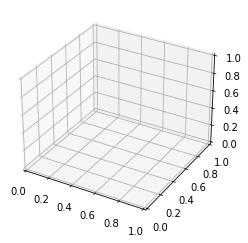

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

plt.show()

Tworzenie danych:

In [3]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

Wykreślanie powierzchni:

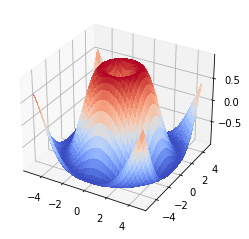

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()

Dostosowanie osi Z:

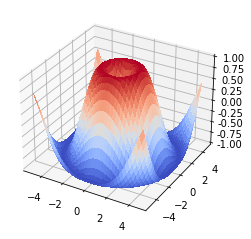

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_zlim(-1.00, 1.00)
ax.zaxis.set_major_locator(LinearLocator(9))
ax.zaxis.set_major_formatter('{x:.02f}')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()

Dodawanie paska kolorów, który odwzorowuje wartości na kolory:

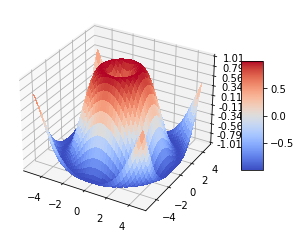

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Trójkątne powierzchnie 3D

Wykreślanie powierzchni 3D (jak w chipsie ziemniaczanym "Pringles") z trójkątną siatką.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Pringles_chips.JPG/471px-Pringles_chips.JPG)

Utworzenie przestrzenii promieni i kątów (pominięto promień $r=0$, aby wyeliminować duplikację):

In [ ]:
n_radii = 8  # liczba promieni
n_angles = 36  # liczba kątów

In [ ]:
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

Zamienianie współrzędnych biegunowych $(radii, angles)$ na współrzędne kartezjańskie $(x, y)$, przy czym $(0, 0)$ jest dodawany ręcznie na tym etapie, więc nie będzie zduplikowanych punktów na płaszczyźnie $(x, y)$:

In [ ]:
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

Obliczenie $z$, aby utworzyć powierzchnię jak w chipsie ziemniaczanym "Pringles":

In [ ]:
z = np.sin(-x*y)

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

plt.show()

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

## Figury interaktywne

Podczas pracy z danymi interaktywność może być nieoceniona. Narzędzia do panoramowania/powiększania i lokalizacji myszy wbudowane w okna GUI Matplotlib są często wystarczające, ale można również użyć systemu zdarzeń do tworzenia niestandardowych narzędzi do eksploracji danych.

Matplotlib jest dostarczany z powiązaniami **backendów** z kilkoma zestawami narzędzi GUI (Qt, Tk, Wx, GTK, macOS, JavaScript), a pakiety stron trzecich zapewniają powiązania z **kivy** i **Jupyter Lab**. Aby figury reagowały na zdarzenia myszy, klawiatury i malowania, pętla zdarzeń GUI musi być zintegrowana z interaktywnym monitem. Zaleca się używanie IPythona.

### Integracja z IPythonem

Zaleca się używanie IPython do interaktywnej powłoki. Oprócz wszystkich swoich funkcji, zapewnia również, że pętla zdarzeń zestawu narzędzi GUI jest prawidłowo zintegrowana z wierszem poleceń.

Aby skonfigurować integrację i włączyć **tryb interaktywny**, używamy `%matplotlib`.

### Jupyter Notebook

W tym przykładzie tworzymy i modyfikujemy figurę za pomocą Jupyter Notebook. Rysunek jest wyświetlany w oknie GUI.

Aby uzyskać interaktywne figury w "klasycznym" Jupyter Notebook, możemy użyć:

In [ ]:
%matplotlib notebook

Korzysta to z backendu dostarczonego przez Matplotlib.

Utwórzenie nowego okna figury:

In [ ]:
fig, ax = plt.subplots()

Dodanie wykresu liniowego danych do okna:

In [ ]:
ln, = ax.plot(range(5))

Zmienienie koloru linii z niebieskiego na pomarańczowy:

In [ ]:
ln.set_color('orange')

### Przykład

Wizualizacja trzech parametrów: VMAF (ang. _Video Multi-Method Assessment Fusion_), obciążenia CPU (ang. _Central Processing Unit_) oraz przepływności wyjściowej strumienia.

[CSV](surface_no_placebo.csv)

Import z biblioteki standardowej:

In [ ]:
import csv

Powiązany import stron trzecich:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
%matplotlib notebook

Czytanie danych:

In [ ]:
x_list, y_list, z_list = [], [], []
with open(file='surface_no_placebo.csv', newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',', quotechar='|')
    next(csv_reader)  # Pomijanie nagłówka
    for row in csv_reader:
        x_value = float(row[0])*100
        y_value = int(row[1])/1_000_000
        z_value = float(row[3])
        x_list.append(x_value)
        y_list.append(y_value)
        z_list.append(z_value)

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Wykreślanie powierzchni:

In [ ]:
surf = ax.plot_trisurf(x_list, y_list, z_list, cmap=cm.viridis)

Dostosowywanie osi:

In [ ]:
ax.set_xlim(763.3587786, 72.99270073)
ax.set_title('VMAF vs. CPU vs. przepływność')
ax.set_xlabel('CPU [%]')
ax.set_ylabel('Przepływność [Mb/s]')
ax.set_zlabel('VMAF');

## Ćwiczenia

In [ ]:
%matplotlib inline

### Narysuj linię z odpowiednią etykietą na osi x, osi y i tytułem

#### Ćwiczenie

Napisz program w Pythonie, który narysuje linię z odpowiednią etykietą na osi x, osi y i tytule.

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-1.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
X = range(1, 50)
Y = [value * 3 for value in X]
print("Wartości X:", *range(1,50))
print("Wartości Y (trzy razy X):", Y)
plt.plot(X, Y)  # Wykreśl linie i/lub znaczniki do osi.
plt.xlabel('x - axis')  # Ustaw etykietę osi x bieżącej osi.
plt.ylabel('y - axis')  # Ustaw etykietę osi y bieżącej osi.
plt.title('Draw a line.')  # Ustaw tytuł
plt.show()  # Pokaż figurę.

### Narysuj linię używając podanych wartości osi z odpowiednią etykietą na osi x, osi y i tytule

#### Ćwiczenie

Napisz program w Pythonie, który narysuje linię przy użyciu podanych wartości osi z odpowiednią etykietą na osi x, osi y i tytule.

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-2.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3]  # wartości osi x
y = [2, 4, 1]  # wartości osi y 
plt.plot(x, y)  # Wykreśl linie i/lub znaczniki do osi.
plt.xlabel('x - axis')  # Ustaw etykietę osi x bieżącej osi.
plt.ylabel('y - axis')  # Ustaw etykietę osi y bieżącej osi.
plt.title('Sample graph!')  # Ustaw tytuł
plt.show()  # Pokaż figurę.

### Narysuj linię korzystając z podanych wartości osi pobranych z pliku tekstowego, z odpowiednią etykietą w osi x, osi y oraz tytułem

#### Ćwiczenie

Napisz program w Pythonie, który narysuje linię przy użyciu podanych wartości osi z odpowiednią etykietą na osi x, osi y i tytule.

[test.txt](test.txt)

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-3.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
with open("test.txt") as f:
    data = f.read()
data = data.split('\n')
x = [int(row.split(' ')[0]) for row in data]
y = [int(row.split(' ')[1]) for row in data]
plt.plot(x, y)  # Wykreśl linie i/lub znaczniki do osi.
plt.xlabel('x - axis')  # Ustaw etykietę osi x bieżącej osi.
plt.ylabel('y - axis')  # Ustaw etykietę osi y bieżącej osi.
plt.title('Sample graph!')  # Ustaw tytuł
plt.show()  # Pokaż figurę.

### Rysuj wykresy liniowe danych finansowych Alphabet Inc. od 3 października 2016 r. do 7 października 2016 r.

#### Ćwiczenie

Napisz program w języku Python do rysowania wykresów liniowych danych finansowych firmy Alphabet Inc. w okresie od 3 października 2016 r. do 7 października 2016 r.

Przykładowe dane finansowe ([fdata.csv](fdata.csv)):

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-4.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('fdata.csv', sep=',', parse_dates=True, index_col=0)
df.plot()
plt.show()

### Wykreśl dwie lub więcej linii na tej samej podziałce z odpowiednimi legendami każdej linii

#### Ćwiczenie

Napisz program w Pythonie, który wykreśli dwie lub więcej linii na tym samym wykresie z odpowiednią legendą każdej linii.

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-5.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
# punkty linii 1
x1 = [10, 20, 30]
y1 = [20, 40, 10]
plt.plot(x1, y1, label = "line 1")  # kreślenie punktów linii 1
# punkty linii 2
x2 = [10, 20, 30]
y2 = [40, 10, 30]
plt.plot(x2, y2, label = "line 2")  # kreślenie punktów linii 1
plt.xlabel('x - axis')  # Ustaw etykietę osi x bieżącej osi.
plt.ylabel('y - axis')  # Ustaw etykietę osi y bieżącej osi.
# Ustaw tytuł aktualnych osi.
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()  # pokaż legendę na podziałce
plt.show()  # Wyświetl figurę.

### Narysuj dwie lub więcej linii z legendami, różnymi szerokościami i kolorami

#### Ćwiczenie

Napisz program w Pythonie, który wykreśli dwie lub więcej linii z legendami, o różnych szerokościach i kolorach.

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-6.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
# punkty linii 1
x1 = [10,20,30]
y1 = [20,40,10]
# punkty linii 2
x2 = [10,20,30]
y2 = [40,10,30]
plt.xlabel('x - axis')  # Ustaw etykietę osi x bieżącej osi.
plt.ylabel('y - axis')  # Ustaw etykietę osi y bieżącej osi.
# Ustaw tytuł
plt.title('Two or more lines with different widths and colors with suitable legends ')
# Pokaż figurę.
plt.plot(x1, y1, color='blue', linewidth = 3,  label = 'line1-width-3')
plt.plot(x2, y2, color='red', linewidth = 5,  label = 'line2-width-5')
plt.legend()  # pokaż legendę na podziałce
plt.show()

### Narysuj dwie lub więcej linii w różnych stylach

#### Ćwiczenie

Napisz program w Pythonie, który wykreśli dwie lub więcej linii w różnych stylach.

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-7.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
# punkty linii 1
x1 = [10,20,30]
y1 = [20,40,10]
# punkty linii 2
x2 = [10,20,30]
y2 = [40,10,30]
plt.xlabel('x - axis')  # Ustaw etykietę osi x bieżącej osi.
plt.ylabel('y - axis')  # Ustaw etykietę osi y bieżącej osi.
# Wykreśl linie i/lub znaczniki do osi.
plt.plot(x1,y1, color='blue', linewidth = 3,  label = 'line1-dotted',linestyle='dotted')
plt.plot(x2,y2, color='red', linewidth = 5,  label = 'line2-dashed', linestyle='dashed')
plt.title("Plot with two or more lines with different styles")  # Ustaw tytuł
plt.legend()  # pokaż legendę na podziałce
plt.show()  # funkcja, aby pokazać podziałkę

### Wykreśl dwie lub więcej linii i ustaw znaczniki linii

#### Ćwiczenie

Napisz program w Pythonie, który kreśli dwie lub więcej linii i ustawia znaczniki linii.

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-8.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
x = [1,4,5,6,7]  # wartości osi x
y = [2,6,3,6,3]  # wartości osi y

# wykreślanie punktów
plt.plot(x, y, color='red', linestyle='dashdot', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylim(1,8)  # Ustaw granice y aktualnych osi.
plt.xlim(1,8)  # Ustaw granice x aktualnych osi.

plt.xlabel('x - axis')  # nazwanie osi X
plt.ylabel('y - axis')  # nazwanie osi Y

plt.title('Display marker')  # nadawanie tytułu wykresowi
plt.show()  # funkcja, aby pokazać podziałkę

### Wyświetl aktualne wartości limitów osi i ustaw nowe wartości osi

#### Ćwiczenie

Napisz program w języku Python, który będzie wyświetlał bieżące wartości graniczne osi i ustawiał nowe wartości osi.

Przykładowy wynik:

`(-1.4000000000000004, 51.4, -4.2, 154.2)`
![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-9.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
X = range(1, 50)
Y = [value * 3 for value in X]
plt.plot(X, Y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Draw a line.')
print(plt.axis())  # pokazuje aktualne wartości limitów osi
# ustaw nowe limity osi
# Limit osi x 0 do 100
# Limit osi y 0 do 200
plt.axis([0, 100, 0, 200]) 
plt.show()  # Wyświetl figurę.

### Wykreśl kilka linii z różnymi stylami formatu w jednym poleceniu za pomocą tablic

#### Ćwiczenie

Napisz program w Pythonie, który będzie kreślił kilka linii z różnymi stylami formatu w jednym poleceniu za pomocą tablic.

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-11.png)

#### Rozwiązanie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Czas próbkowania w odstępach 200ms
t = np.arange(0., 5., 0.2)

# zielone kreski, niebieskie kwadraty i czerwone trójkąty
plt.plot(t, t, 'g--', t, t**2, 'bs', t, t**3, 'r^')
plt.show()

### Utwórz wiele podziałek

#### Ćwiczenie

Napisz program w Pythonie do tworzenia wielu wykresów

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-15.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.subplots_adjust(bottom=0.020, left=0.020, top = 0.900, right=0.800)

plt.subplot(2, 1, 1)
plt.xticks(()), plt.yticks(())

plt.subplot(2, 3, 4)
plt.xticks(()), plt.yticks(())

plt.subplot(2, 3, 5)
plt.xticks(()), plt.yticks(())

plt.subplot(2, 3, 6)
plt.xticks(()), plt.yticks(())

plt.show()

### Wyświetl wykres słupkowy popularności języków programowania

#### Ćwiczenie

Napisz program w Pythonie, aby wyświetlić wykres słupkowy popularności języków programowania.

Przykładowe dane:

Języki programowania: `'Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++'`

Popularność: `22.2, 17.6, 8.8, 8, 7.7, 6.7`

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-barchart-exercise-1.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, popularity, color='blue')
plt.xlabel("Languages")
plt.ylabel("Popularity")
plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
plt.xticks(x_pos, x)
plt.minorticks_on()  # Włącz siatkę
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Dostosuj mniejszą siatkę
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Wyświetl poziomy wykres słupkowy popularności języków programowania

#### Ćwiczenie

Napisz program w Pythonie wyświetlający poziomy wykres słupkowy popularności języków programowania.

Przykładowe dane:

Języki programowania: `'Java', 'Python', 'PHP', 'JS', 'C#', 'C++'`

Popularność: `22.2, 17.6, 8.8, 8, 7.7, 6.7`

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-barchart-exercise-2.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
x = ['Java', 'Python', 'PHP', 'JS', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, popularity, color='green')
plt.xlabel("Popularity")
plt.ylabel("Languages")
plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
plt.yticks(x_pos, x)
plt.minorticks_on()  # Włącz siatkę
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Dostosuj mniejszą siatkę
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Wyświetl wykres słupkowy popularności języków programowania

#### Ćwiczenie

Napisz program w Pythonie wyświetlający poziomy wykres słupkowy popularności języków programowania.

Przykładowe dane:

Języki programowania: `'Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++'`

Popularność: `22.2, 17.6, 8.8, 8, 7.7, 6.7`

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-barchart-exercise-3.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, popularity, color=(0.4, 0.6, 0.8, 1.0))

plt.xlabel("Languages")
plt.ylabel("Popularity")
plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
plt.xticks(x_pos, x)
plt.minorticks_on()  # Włącz siatkę
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Dostosuj mniejszą siatkę
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Wyświetl wykres słupkowy popularności języków programowania, używając innego koloru dla każdego słupka

#### Ćwiczenie

Napisz program w Pythonie wyświetlający wykres słupkowy popularności języków programowania. Użyj innego koloru dla każdego paska.

Przykładowe dane:

Języki programowania: `'Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++'`

Popularność: `22.2, 17.6, 8.8, 8, 7.7, 6.7`

Przykładowy wynik:

![](https://www.w3resource.com/w3r_images/matplotlib-barchart-exercise-4.png)

#### Rozwiązanie

In [ ]:
import matplotlib.pyplot as plt
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, popularity, color=['red', 'black', 'green', 'blue', 'yellow', 'cyan'])

plt.xlabel("Languages")
plt.ylabel("Popularity")
plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
plt.xticks(x_pos, x)
plt.minorticks_on()  # Włącz siatkę
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Dostosuj mniejszą siatkę
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()